#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [26]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("/content/imdb_top_10000.txt", sep = '\t')
df.head()

tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.  \
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.   
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.   
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.   
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.   
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.   

                        Crime|Drama  
0                    Crime|Thriller  
1            Drama|Mystery|Thriller  
2           Action|Adventure|Sci-Fi  
3  Action|Adventure|Sci-Fi|Thriller  
4              Comedy|Drama|Romance

In [28]:
df = pd.read_csv("/content/imdb_top_10000.txt", sep = '\t',names = ["imdbID","title","year","score","votes","runtime","genres"])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [29]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [30]:
df = df.dropna(subset=['genres'])
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

## 2. Asking Questions

which movie is the best with regards to score in each year?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [31]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [32]:
runtime =[int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime'] = runtime
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [33]:
#dealing with genre
firstgenre= df['genres'][0]
print(firstgenre)

Crime|Drama


In [34]:
set_genre = set()

In [35]:
for genre in df.genres:
  set_genre.update(genre.split("|"))
print(len(set_genre))

24


In [36]:
for genre in set_genre:
  df[genre] = [genre in row.split("|") for row in df.genres]

genredf = df[list(set_genre)]
genredf.head()

Animation  Romance  Mystery  Adult  Music  Crime  Fantasy  Musical  \
0      False    False    False  False  False   True    False    False   
1      False    False    False  False  False   True    False    False   
2      False    False     True  False  False  False    False    False   
3      False    False    False  False  False  False    False    False   
4      False    False    False  False  False  False    False    False   

   History  Sci-Fi  ...  Family  Biography  Reality-TV  Western  Comedy  \
0    False   False  ...   False      False       False    False   False   
1    False   False  ...   False      False       False    False   False   
2    False   False  ...   False      False       False    False   False   
3    False    True  ...   False      False       False    False   False   
4    False    True  ...   False      False       False    False   False   

   Sport  Action  Horror   News  Adventure  
0  False   False   False  False      False  
1  False   False   False  False      False  
2  False   False   False  False      False  
3  False    True   False  False       True  
4  False    True   False  False       True  

[5 rows x 24 columns]

In [37]:
df.drop('genres', axis = 1, inplace=True)

In [38]:
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

   Animation  Romance  Mystery  Adult  ...  Family  Biography  Reality-TV  \
0      False    False    False  False  ...   False      False       False   
1      False    False    False  False  ...   False      False       False   
2      False    False     True  False  ...   False      False       False   
3      False    False    False  False  ...   False      False       False   
4      False    False    False  False  ...   False      False       False   

   Western  Comedy  Sport  Action  Horror   News  Adventure  
0    False   False  False   False   False  False      False  
1    False   False  False   False   False  False      False  
2    False   False  False   False   False  False      False  
3    False   False  False    True   False  False       True  
4    False   False  False    True   False  False       True  

[5 rows x 30 columns]

In [39]:
#dealing with the tiltl, removing the year
title = df['title'][0]
title

'The Shawshank Redemption (1994)'

In [40]:
df['title'] = [t[0:-7] for t in df.title]
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

   Animation  Romance  Mystery  Adult  ...  Family  Biography  Reality-TV  \
0      False    False    False  False  ...   False      False       False   
1      False    False    False  False  ...   False      False       False   
2      False    False     True  False  ...   False      False       False   
3      False    False    False  False  ...   False      False       False   
4      False    False    False  False  ...   False      False       False   

   Western  Comedy  Sport  Action  Horror   News  Adventure  
0    False   False  False   False   False  False      False  
1    False   False  False   False   False  False      False  
2    False   False  False   False   False  False      False  
3    False   False  False    True   False  False       True  
4    False   False  False    True   False  False       True  

[5 rows x 30 columns]

## 4. EDA

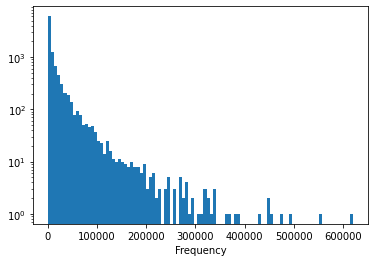

In [41]:
from pandas.errors import InvalidIndexError
%matplotlib inline
x = df.votes
plt.hist(x,bins = 100, log = True)
plt.xlabel("Frequency")
plt.show()

## 5. Determining Best Movies

In [42]:
yeardf =df.groupby('year', sort=True)
print(yeardf)



In [43]:
#bestMovie = yeardf[['score','votes']].max()
#print(bestMovie.score, bestMovie.votes)

for key, data in yeardf:
    df2 = data[data.score == data.score.max()]
    print(df2.year,df2.title, df2.score, df2.votes)

556    1950
Name: year, dtype: int64 556    Sunset Blvd.
Name: title, dtype: object 556    8.7
Name: score, dtype: float64 556    64363
Name: votes, dtype: int64
1034    1951
Name: year, dtype: int64 1034    Strangers on a Train
Name: title, dtype: object 1034    8.3
Name: score, dtype: float64 1034    40104
Name: votes, dtype: int64
561    1952
Name: year, dtype: int64 561    Singin' in the Rain
Name: title, dtype: object 561    8.4
Name: score, dtype: float64 561    63655
Name: votes, dtype: int64
2350    1953
3367    1953
Name: year, dtype: int64 2350    The Wages of Fear
3367          Tokyo Story
Name: title, dtype: object 2350    8.3
3367    8.3
Name: score, dtype: float64 2350    16721
3367     9764
Name: votes, dtype: int64
212    1954
Name: year, dtype: int64 212    Seven Samurai
Name: title, dtype: object 212    8.8
Name: score, dtype: float64 212    111707
Name: votes, dtype: int64
2220    1955
Name: year, dtype: int64 2220    Diabolique
Name: title, dtype: object 2220    8.3

## 6. Trends in Popularity of Genres

In [44]:
genredf = df[list(set_genre)]
genredf.head()

Animation  Romance  Mystery  Adult  Music  Crime  Fantasy  Musical  \
0      False    False    False  False  False   True    False    False   
1      False    False    False  False  False   True    False    False   
2      False    False     True  False  False  False    False    False   
3      False    False    False  False  False  False    False    False   
4      False    False    False  False  False  False    False    False   

   History  Sci-Fi  ...  Family  Biography  Reality-TV  Western  Comedy  \
0    False   False  ...   False      False       False    False   False   
1    False   False  ...   False      False       False    False   False   
2    False   False  ...   False      False       False    False   False   
3    False    True  ...   False      False       False    False   False   
4    False    True  ...   False      False       False    False   False   

   Sport  Action  Horror   News  Adventure  
0  False   False   False  False      False  
1  False   False   False  False      False  
2  False   False   False  False      False  
3  False    True   False  False       True  
4  False    True   False  False       True  

[5 rows x 24 columns]

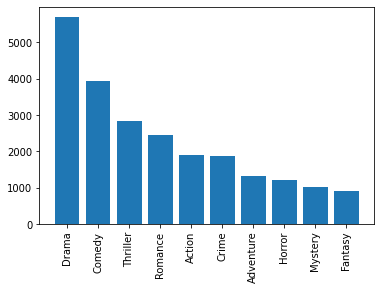

In [45]:
y = genredf.sum().sort_values(ascending = False)[:10]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()